In [9]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import skvideo.io
import numpy as np
import sys
import time

In [4]:
sys.path.append("/tf_model/research")
from object_detection.utils import visualization_utils as vis_utils
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util

/home/imam.rahman/Work/jupyter notebook/Tensor Flow/Object Detection/tf_model/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/imam.rahman/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/imam.rahman/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/imam.rahman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/imam.rahman/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File 

In [5]:
PATH_TO_CKPT = "model/ssd_mobilenet_v1_waifu_2018_02_12/frozen_inference_graph.pb"
PATH_TO_LABELS = "model/ssd_mobilenet_v1_waifu_2018_02_12/label.pbtxt"
NUM_CLASSES = 1

In [6]:
# Load frozen model to memory
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [7]:
# Load label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

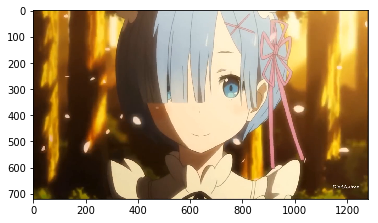

In [19]:
#test image
vidcap = skvideo.io.vreader("vid_raw/rem_3.mp4")
for i in range(2500):
    frame = vidcap.next()
plt.imshow(frame)
frames = np.array([frame])

In [21]:
#image_np_expanded = np.expand_dims(frames, axis=0)
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
scores = detection_graph.get_tensor_by_name('detection_scores:0')
classes = detection_graph.get_tensor_by_name('detection_classes:0')
num_detections = detection_graph.get_tensor_by_name('num_detections:0')
#detection_mask = detection_graph.get_tensor_by_name('detection_masks:0')

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Actual detection.
        (boxes, scores, classes, num_detections) = sess.run(
            [boxes, scores, classes, num_detections],
            feed_dict={image_tensor: frames})
        
boxes = boxes[0]
scores = scores[0]
num_detections = int(num_detections[0])
classes = classes[0].astype(np.uint8)

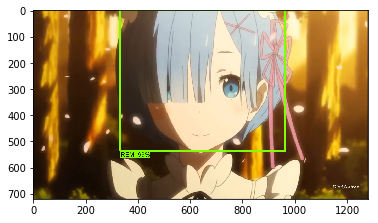

In [22]:
res = vis_utils.visualize_boxes_and_labels_on_image_array(
    frames[0],
    boxes,
    classes,
    scores,
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8
)

plt.imshow(res)

# Add tag to video

In [25]:
import json
#vidcap = skvideo.io.vreader("vid_raw/rem_test.mp4")
metadata = skvideo.io.ffprobe("vid_raw/rem_4.mp4")
print json.dumps(metadata["video"], indent=4)

{
    "@index": "0", 
    "@codec_name": "h264", 
    "@codec_long_name": "H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10", 
    "@profile": "Main", 
    "@codec_type": "video", 
    "@codec_time_base": "8496613/407430000", 
    "@codec_tag_string": "avc1", 
    "@codec_tag": "0x31637661", 
    "@width": "1280", 
    "@height": "720", 
    "@coded_width": "1280", 
    "@coded_height": "720", 
    "@has_b_frames": "1", 
    "@sample_aspect_ratio": "1:1", 
    "@display_aspect_ratio": "16:9", 
    "@pix_fmt": "yuv420p", 
    "@level": "31", 
    "@color_range": "tv", 
    "@color_space": "bt709", 
    "@color_transfer": "bt709", 
    "@color_primaries": "bt709", 
    "@chroma_location": "left", 
    "@refs": "1", 
    "@is_avc": "true", 
    "@nal_length_size": "4", 
    "@r_frame_rate": "24000/1001", 
    "@avg_frame_rate": "203715000/8496613", 
    "@time_base": "1/90000", 
    "@start_pts": "0", 
    "@start_time": "0.000000", 
    "@duration_ts": "16993226", 
    "@duration": "188.813622"

In [27]:
## Edit a video

## Load Video
vidcap = skvideo.io.vreader("vid_raw/rem_4.mp4")

# ## Writer
writer = skvideo.io.FFmpegWriter("vid_raw/detection_rem_4.mp4", inputdict={
      '-r': "24000/1001",
    },
    outputdict={
      '-vcodec': 'libx264',
      '-pix_fmt': 'yuv420p',
      '-r': "24000/1001",})

## Start Session
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
scores = detection_graph.get_tensor_by_name('detection_scores:0')
classes = detection_graph.get_tensor_by_name('detection_classes:0')
num_detections = detection_graph.get_tensor_by_name('num_detections:0')
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for i,f in enumerate(vidcap):
            f = np.array([f])
            
            # Detection.
            (boxes_r, scores_r, classes_r, num_detections_r) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: f})
            
            boxes_r = boxes_r[0]
            scores_r = scores_r[0]
            num_detections_r = int(num_detections_r[0])
            classes_r = classes_r[0].astype(np.uint8)
            
            res = vis_utils.visualize_boxes_and_labels_on_image_array(
                f[0],
                boxes_r,
                classes_r,
                scores_r,
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8
            )
            
#             ax = plt.imshow(res)
#             display.clear_output(wait=True)
#             display.display(ax.figure)
#             time.sleep(1./30)
            writer.writeFrame(res)
            if i==0 or i%100 == 0:
                print "Writing Frame-{}".format(i)
                
#             if i==1000:
#                 break
            
writer.close()      

Writing Frame-0
Writing Frame-100
Writing Frame-200
Writing Frame-300
Writing Frame-400
Writing Frame-500
Writing Frame-600
Writing Frame-700
Writing Frame-800
Writing Frame-900
Writing Frame-1000
Writing Frame-1100
Writing Frame-1200
Writing Frame-1300
Writing Frame-1400
Writing Frame-1500
Writing Frame-1600
Writing Frame-1700
Writing Frame-1800
Writing Frame-1900
Writing Frame-2000
Writing Frame-2100
Writing Frame-2200
Writing Frame-2300
Writing Frame-2400
Writing Frame-2500
Writing Frame-2600
Writing Frame-2700
Writing Frame-2800
Writing Frame-2900
Writing Frame-3000
Writing Frame-3100
Writing Frame-3200
Writing Frame-3300
Writing Frame-3400
Writing Frame-3500
Writing Frame-3600
Writing Frame-3700
Writing Frame-3800
Writing Frame-3900
Writing Frame-4000
Writing Frame-4100
Writing Frame-4200
Writing Frame-4300
Writing Frame-4400
Writing Frame-4500
